# 데이터 변환
- 카테고리 변환
- 로그 변환
- 스케일링
- 결측치 처리

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터
- 타이타닉 생존자 예측

- Survival - 생존여부: 0 = No, 1 = Yes
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
train = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/titanic_train.csv")
print(train.shape)
train[:3]

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df = train

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 확인

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 카테고리 변수

###  항구
- 원 핫 인코딩
- get_dummies 사용
- Embarked 인코딩

In [7]:
df.Embarked.isnull().sum()

2

### 결측치 항목 삭제

In [8]:
df = df[~df.Embarked.isnull()]; df.shape

(889, 12)

In [9]:
df_embarked = pd.get_dummies(df["Embarked"], prefix="Embarked")
df_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


### 선실 등급

In [10]:
df.Pclass.value_counts()
# 카테고리 변수?

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [11]:
df_class = pd.get_dummies(df["Pclass"], prefix="Class")
df_class.head()

,Class_1,Class_2,Class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


### 성별

In [12]:
df_sex = pd.get_dummies(df["Sex"], prefix="Sex")
df_sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


## 연속 변수

### 나이

In [13]:
# 결측치 비율
df.Age.isnull().mean()

0.19910011248593926

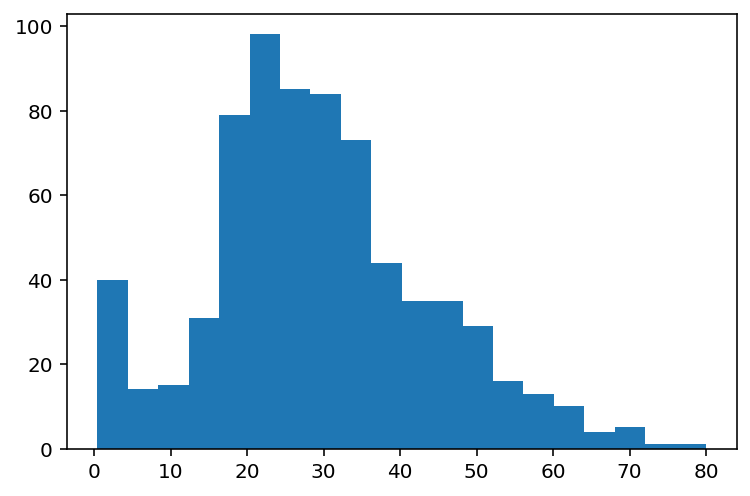

In [14]:
plt.hist(df.Age, bins=20); plt.show()

In [15]:
df.Age.mean()

29.64209269662921

In [16]:
# 평균 나이로 대체
df.Age.fillna(df.Age.mean(), inplace=True); df.Age.isnull().sum()

0

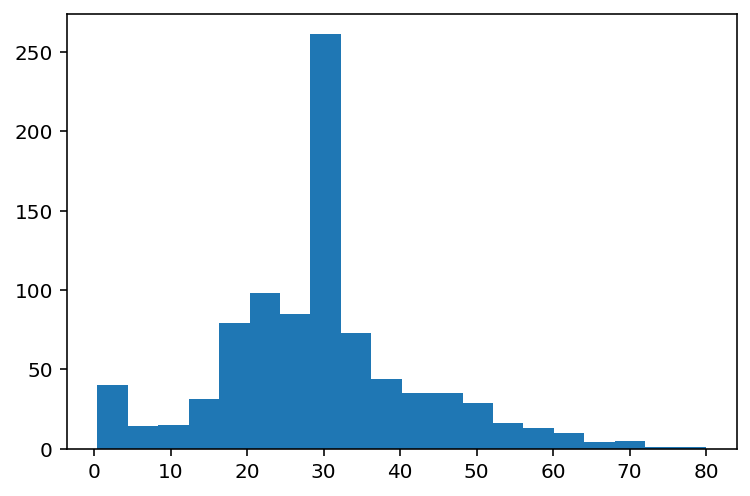

In [17]:
plt.hist(df.Age, bins=20); plt.show()

### 요금

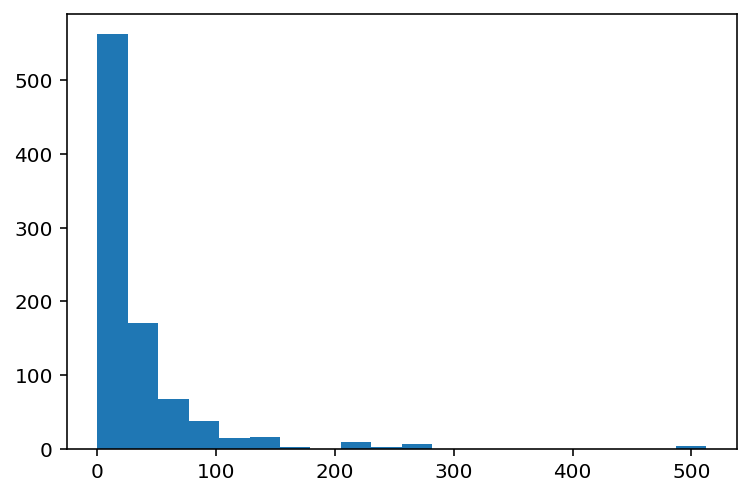

In [18]:
plt.hist(df.Fare, bins=20); plt.show()

In [19]:
df.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

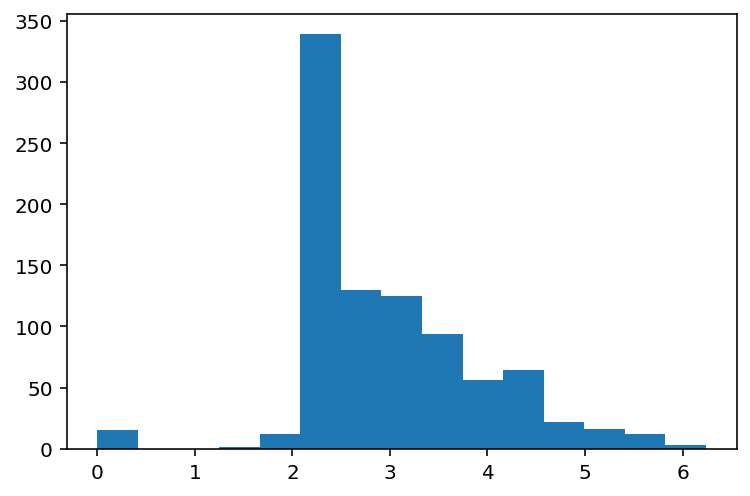

In [20]:
plt.hist(np.log(df.Fare+1), bins=15); plt.show()

### 미지수..

In [164]:
df.SibSp.nunique(), df.SibSp.unique()

(7, array([1, 0, 3, 4, 2, 5, 8]))

In [21]:
col_list = ['SibSp','Parch', 'Ticket']
for c in col_list:
    print(df[c].nunique())

7
7
680


## 컬럼 취합

In [22]:
df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
df.shape

(889, 12)

In [31]:
X = df[['Age', 'SibSp', 'Parch', 'Fare',]];X[:3]

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250


In [32]:
X = pd.concat([X, df_embarked, df_class, df_sex], axis=1)
X[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,0,0,1,1,0


In [33]:
X.Fare = np.log(X.Fare +1); X[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,22.0,1,0,2.110213,0,0,1,0,0,1,0,1
1,38.0,1,0,4.280593,1,0,0,1,0,0,1,0
2,26.0,0,0,2.188856,0,0,1,0,0,1,1,0


### 스케일링

In [34]:
sc = StandardScaler()
X_sc = X.copy()
X_sc[['Age', 'SibSp', 'Parch', 'Fare']] = sc.fit_transform(X_sc[['Age', 'SibSp', 'Parch', 'Fare']])

In [35]:
X[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,22.0,1,0,2.110213,0,0,1,0,0,1,0,1
1,38.0,1,0,4.280593,1,0,0,1,0,0,1,0
2,26.0,0,0,2.188856,0,0,1,0,0,1,1,0


In [36]:
X_sc[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,-0.589620,0.431350,-0.474326,-0.877591,0,0,1,0,0,1,0,1
1,0.644848,0.431350,-0.474326,1.366380,1,0,0,1,0,0,1,0
2,-0.281003,-0.475199,-0.474326,-0.796281,0,0,1,0,0,1,1,0


## 목적 변수

In [37]:
y = df.Survived
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

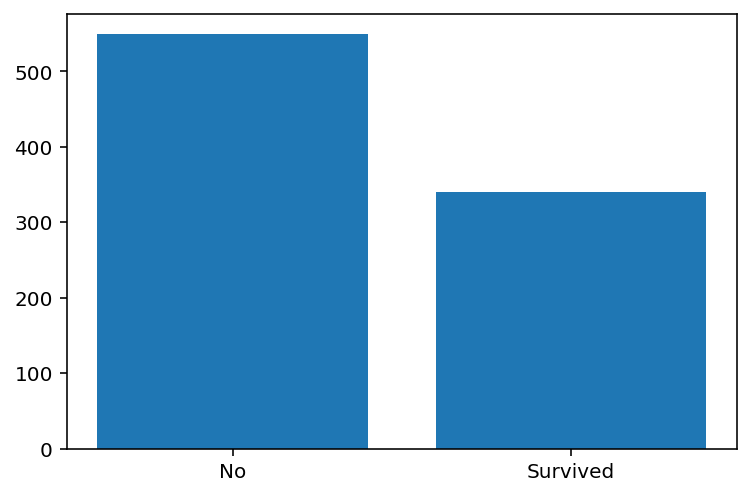

In [38]:
plt.bar(['No','Survived'],y.value_counts())

## 훈련

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=9)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7309417040358744

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=9)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7713004484304933

In [42]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
model = SGDClassifier(random_state=9)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6995515695067265

In [45]:
# 스케일 데이터 사용